In [6]:
import layoutparser as lp
import fitz
from PIL import Image
import cv2

In [7]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config', 
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


In [8]:
color_map = {
'Text': 'red',
'Title': 'blue',
'List': 'green',
'Table': 'purple',
'Figure': 'pink',
}

In [25]:
pdf_path = "data/NAB/Berichte_NAB 10-025_Kurzarbeitsprogram Geothermiebohrung Schlattingen.PDF"
pdf_path = "data/test/1062.pdf"
with fitz.Document(pdf_path) as doc:
    page = doc.load_page(5)
    pixmap = page.get_pixmap()
    image = Image.frombytes("RGB", [pixmap.width, pixmap.height], pixmap.samples)
    image.show()

In [26]:
layout = model.detect(image)

In [27]:
layout_predicted = model.detect(image)

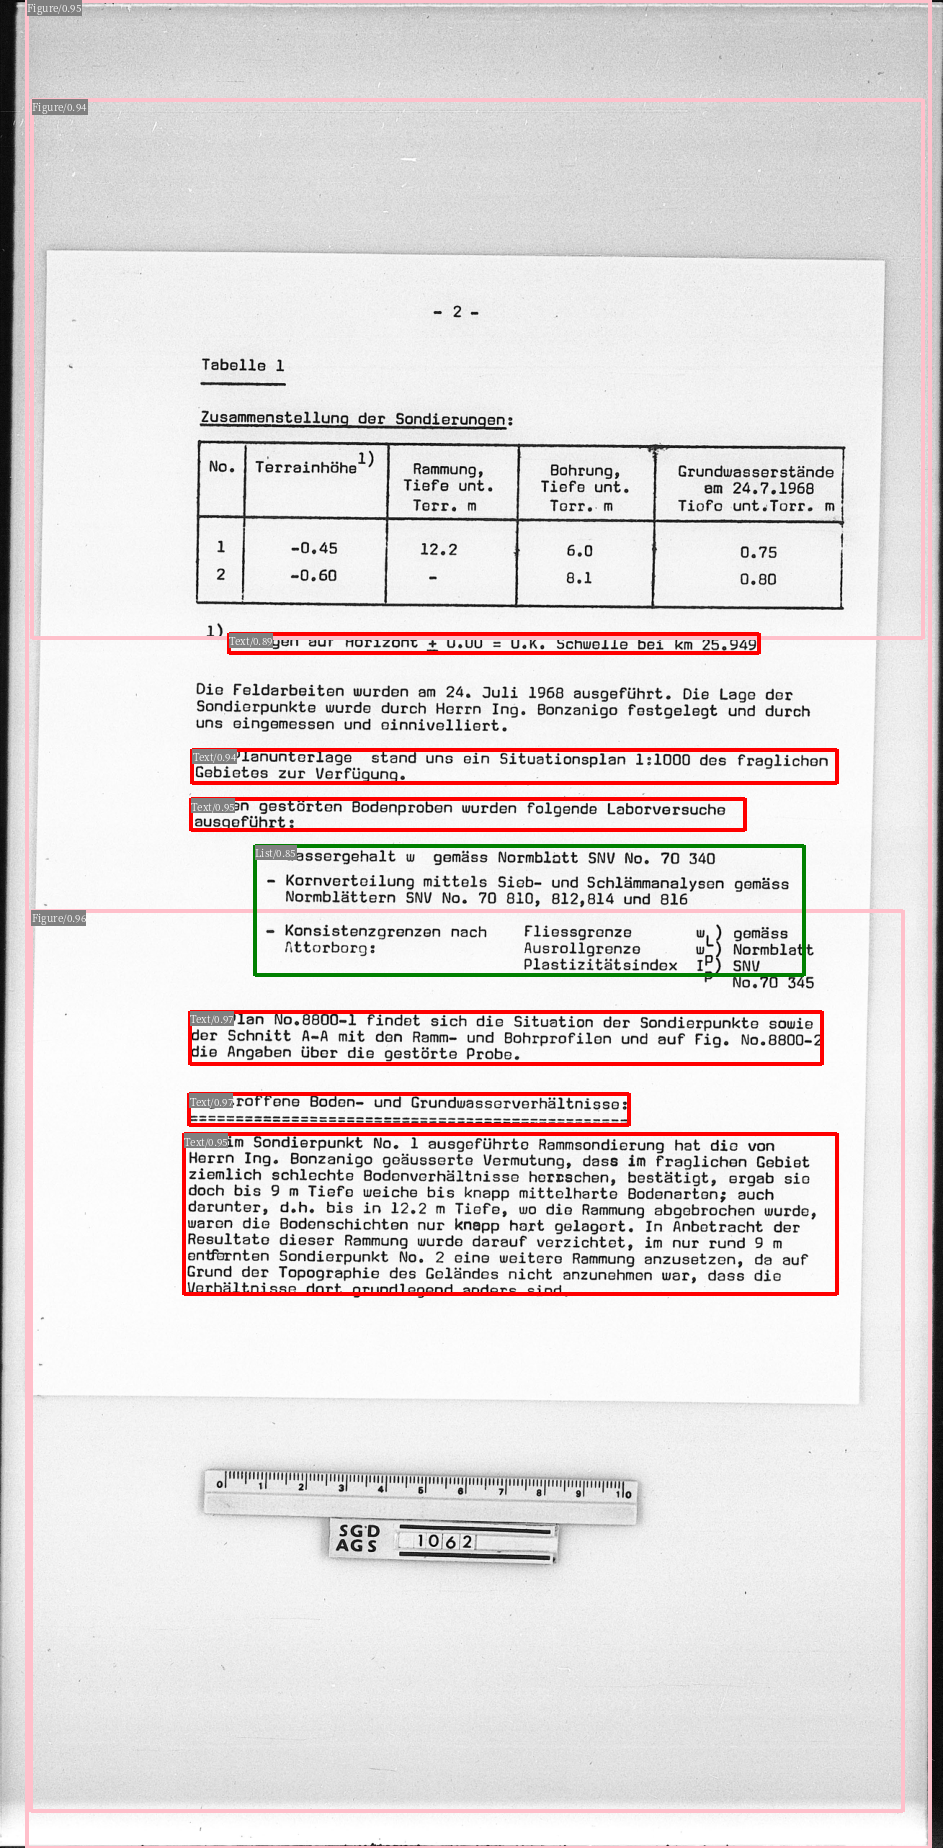

In [28]:

lp.draw_box(image, 
              [b.set(id=f'{b.type}/{b.score:.2f}') for b in layout_predicted],
              show_element_id=True, id_font_size=10, 
              color_map = color_map,
              id_text_background_color='grey',
              id_text_color='white')

In [13]:
layout[0]

TextBlock(block=Rectangle(x_1=85.51634979248047, y_1=498.8826904296875, x_2=512.2545776367188, y_2=572.7926635742188), text=None, id=None, type=Text, parent=None, next=None, score=0.9979085922241211)

In [14]:
text_blocks = lp.Layout([b for b in layout if b.type=='Text'])
figure_blocks = lp.Layout([b for b in layout if b.type=='Figure'])

In [10]:
text_blocks = lp.Layout([b for b in text_blocks \
                   if not any(b.is_in(b_fig) for b_fig in figure_blocks)])

In [11]:
h, w = image.shape[:2]

left_interval = lp.Interval(0, w/2*1.05, axis='x').put_on_canvas(image)

left_blocks = text_blocks.filter_by(left_interval, center=True)
left_blocks.sort(key = lambda b:b.coordinates[1], inplace=True)
# The b.coordinates[1] corresponds to the y coordinate of the region
# sort based on that can simulate the top-to-bottom reading order 
right_blocks = lp.Layout([b for b in text_blocks if b not in left_blocks])
right_blocks.sort(key = lambda b:b.coordinates[1], inplace=True)

# And finally combine the two lists and add the index
text_blocks = lp.Layout([b.set(id = idx) for idx, b in enumerate(left_blocks + right_blocks)])

In [12]:
ocr_agent = lp.TesseractAgent(languages='eng') 

In [13]:
for block in text_blocks:
    segment_image = (block
                       .pad(left=5, right=5, top=5, bottom=5)
                       .crop_image(image))
        # add padding in each image segment can help
        # improve robustness 
        
    text = ocr_agent.detect(segment_image)
    block.set(text=text, inplace=True)

In [14]:
for txt in text_blocks.get_texts():
    print(txt, end='\n---\n')

Im Erfolgsfall, das heisst, wenn die angetroffene Transmissivitat im Zielhorizont der ersten
Bobrung ausreichend ist wird eine Doublettenanlage mit Injektions- und Extraktionsbohrung
erstellt. Die zweite Bohrung wird dann als abgelenkte Bohrung vom selben Bohrplatz in den
Zielhorizont Oberer Muschelkalk abgeteuft (dh. vertikale Teufe ca. 1250 m u.GOK). Der
Bobransatzpunkt mit dem zweiten Bohrkeller ist ca. 10 m vom Ansatzpunkt der ersten Bohrung
entfernt (vgl. Fig. 9 + Fig. 14). Fir die endgiltige Auswabl des ndrdlichen baw. stidlichen
Ansatzpunktes fiir die 1. resp. 2. Bobrung sollen noch die Ergebnisse des Reprocessing der
‘Gee cade,

---


In [15]:
figure_blocks

Layout(_blocks=[TextBlock(block=Rectangle(x_1=133.30950927734375, y_1=108.46159362792969, x_2=550.5640869140625, y_2=634.9371948242188), text=None, id=None, type=Figure, parent=None, next=None, score=0.9932401180267334)], page_data={})